Import Libraries


In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  


Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv("train (1).csv") 
print(df.head())  # Display first 5 rows


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [10]:
# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index([], dtype='object')


In [11]:
df = pd.get_dummies(df, drop_first=True)


In [12]:
print(df.dtypes)  # Check data types of all columns


Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 246, dtype: object


In [14]:
# Fill numerical missing values with median
df.fillna(df.median(), inplace=True)

# Fill categorical missing values with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [15]:
df.dropna(axis=1, inplace=True)  # Drop columns with NaN values


In [16]:
print(df.isnull().sum().sum())  # Should print 0


0


In [17]:


# Define features & target
X = df.drop("SalePrice", axis=1)  
y = df["SalePrice"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Exploratory Data Analysis (EDA)

Id                       0
ExterCond_Gd             0
ExterCond_TA             0
Foundation_CBlock        0
Foundation_PConc         0
                        ..
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Feedr         0
SaleCondition_Partial    0
Length: 246, dtype: int64


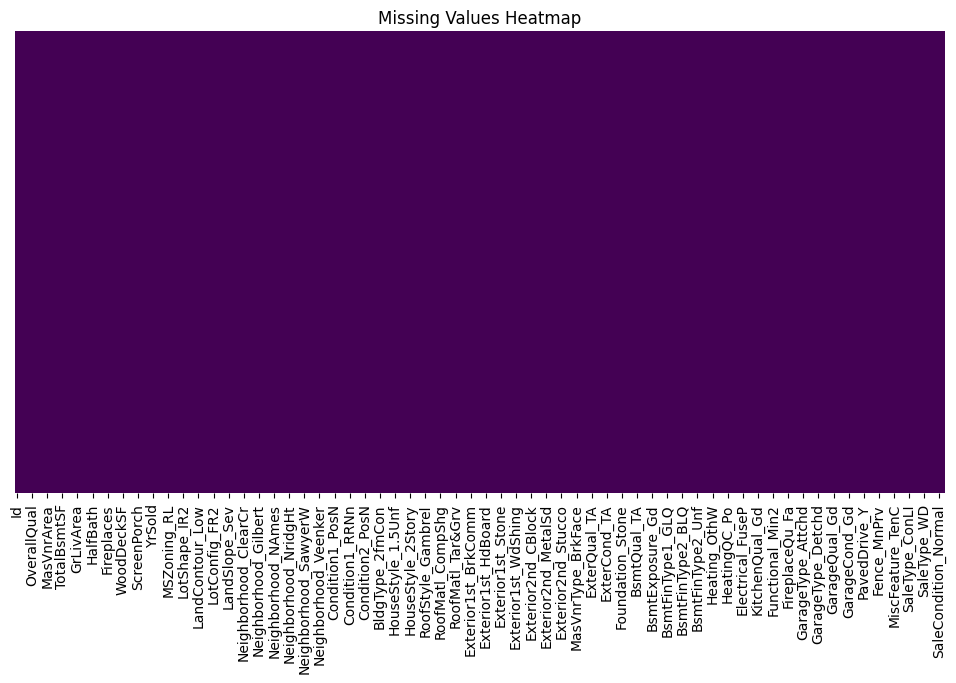

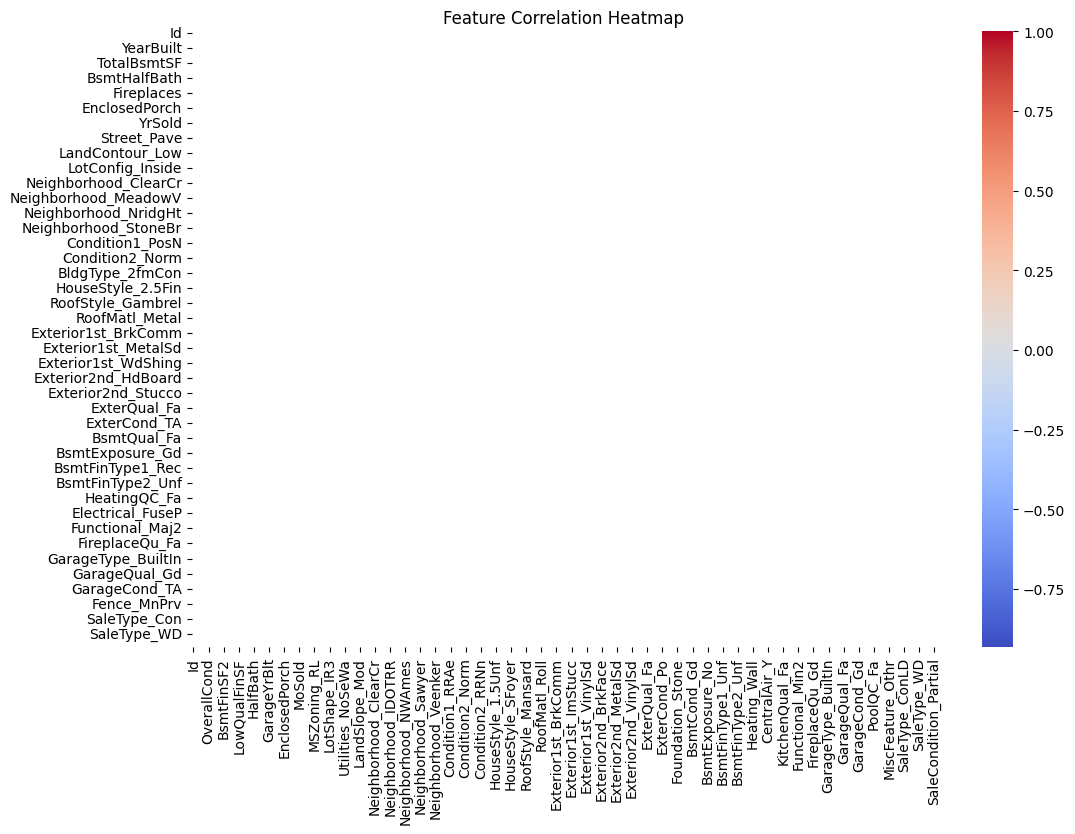

In [18]:
# Check for missing values
print(df.isnull().sum().sort_values(ascending=False))

# Visualizing missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()


Data Preprocessing

In [19]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Select important features based on correlation
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
X = df[selected_features]  # Features
y = df['SalePrice']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the Model

In [20]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions & Evaluate Model

In [22]:
y_pred = model.predict(X_test)

# Model Performance
print(" Mean Absolute Error:", mean_absolute_error(y_test, y_pred))  
print(" Mean Squared Error:", mean_squared_error(y_test, y_pred))  
print(" R2 Score:", r2_score(y_test, y_pred))  


 Mean Absolute Error: 25446.05473921249
 Mean Squared Error: 1602914819.4439096
 R2 Score: 0.7910239048318477


Data Visualization 

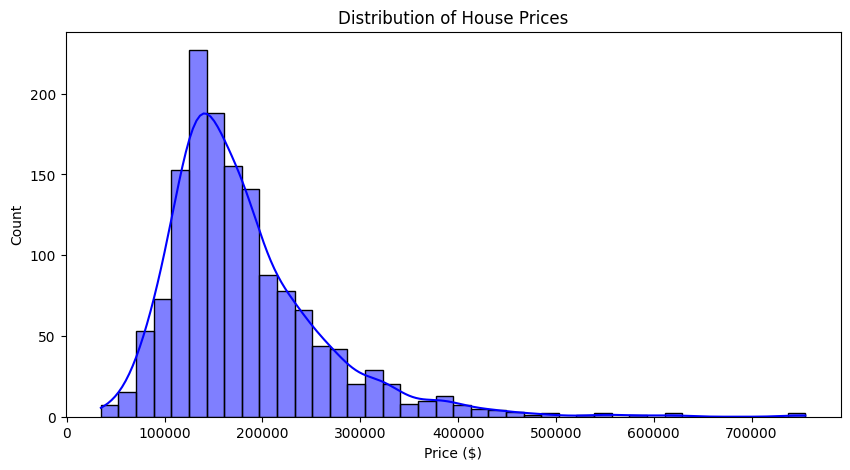

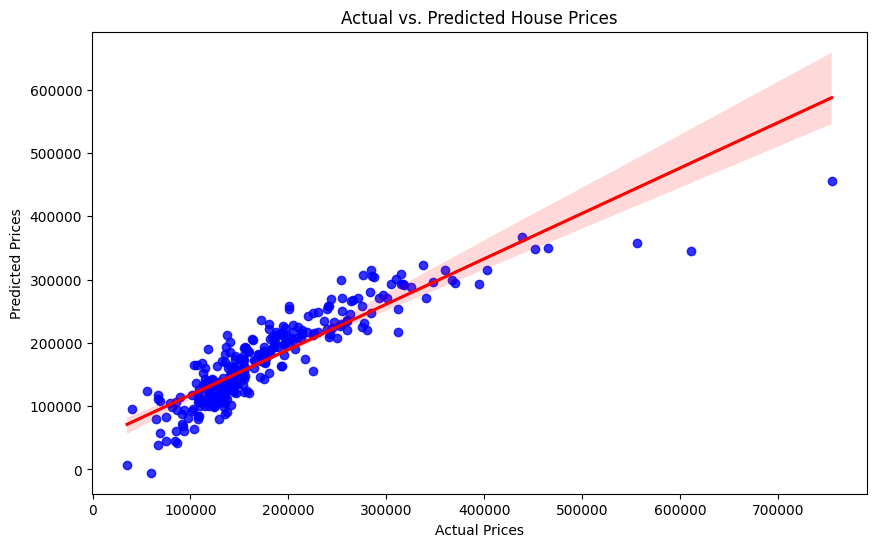

In [23]:
# House Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["SalePrice"], bins=40, kde=True, color="blue")
plt.title("Distribution of House Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# Actual vs Predicted Prices
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()
